In [2]:
import pandas as pd

tickers = ["BA", "NFLX", "TSLA", "BTCUSD"]

news = {}
aggr = {}

for ticker in tickers:
    news[ticker] = pd.read_csv(f"DATA/final_news/{ticker}_full_scores.csv")
    aggr[ticker] = pd.read_csv(f"DATA/final_news/{ticker}_full_agg.csv")

In [4]:
# calculate how many days of the week passed from 01.01.2021 to 26.11.2023

aggr['date'] = pd.to_datetime(news['published_at'])
aggr['weekday'] = aggr['date'].dt.dayofweek
# count the occurrences of each weekday
aggr['weekday'].value_counts()

# calculate how many each days of the week passed from 01.01.2021 to 26.11.2023






KeyError: 'published_at'

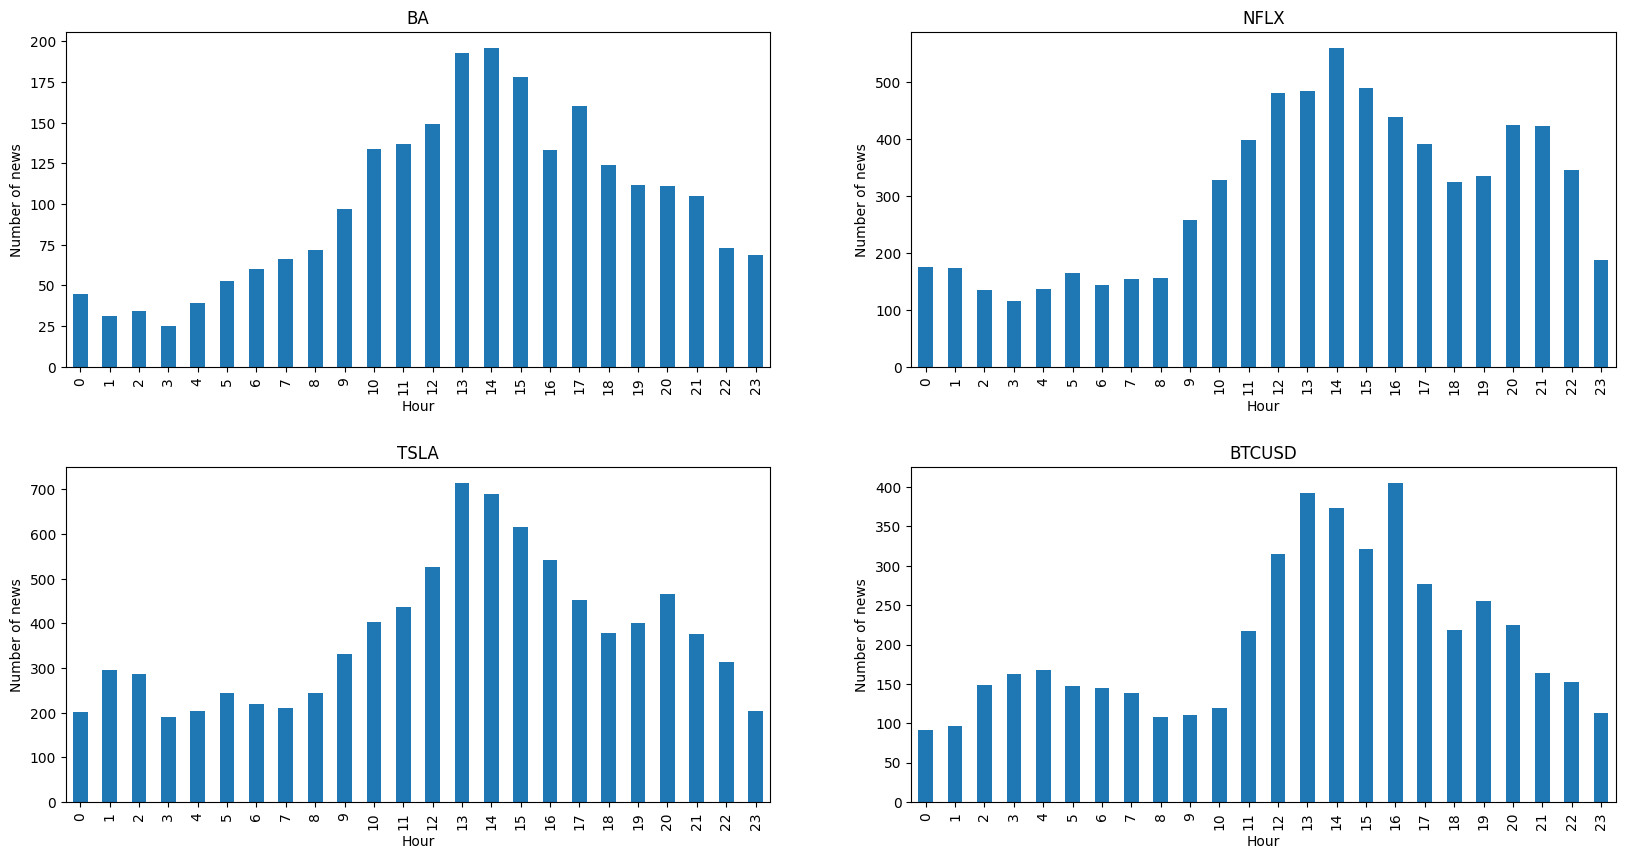

In [11]:
# plot the number of news by hour of the day for each ticker in dict
import matplotlib.pyplot as plt
# make this plot bigger
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 2)

for i, ticker in enumerate(tickers):
    news[ticker]['hour'] = pd.to_datetime(news[ticker]['published_at']).dt.hour
    news[ticker]['hour'].value_counts().sort_index().plot(kind='bar', title=ticker, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(ticker)
    axs[i//2, i%2].set_xlabel('Hour')
    axs[i//2, i%2].set_ylabel('Number of news')

plt.subplots_adjust(hspace=0.3)

plt.savefig('DATA/images/ALL_news_by_hour.png')
    

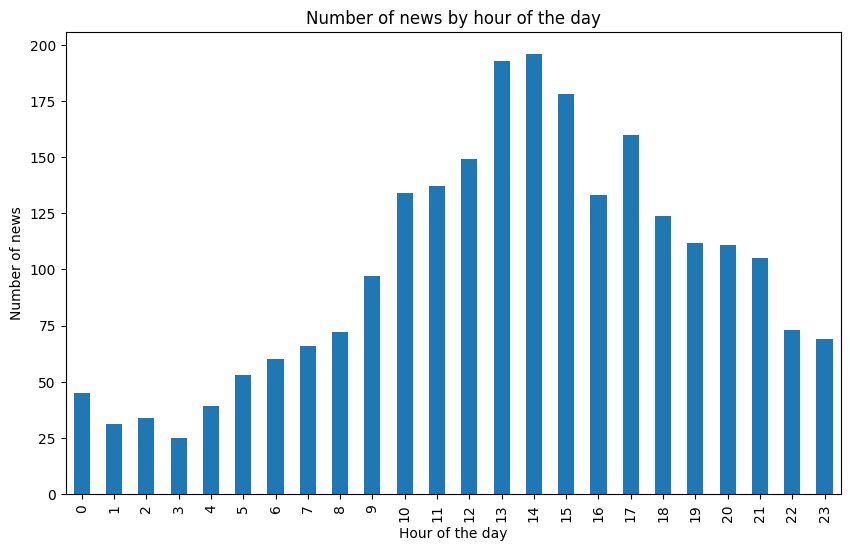

In [6]:
import matplotlib.pyplot as plt
# plot the number of news by hour of the day
news['hour'] = pd.to_datetime(news['published_at']).dt.hour
news['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
# set plot title
plt.title("Number of news by hour of the day")
# set x-axis label
plt.xlabel("Hour of the day")
# set y-axis label
plt.ylabel("Number of news")

# save plot as image
plt.savefig('DATA/images/hourly_news.png', bbox_inches='tight')


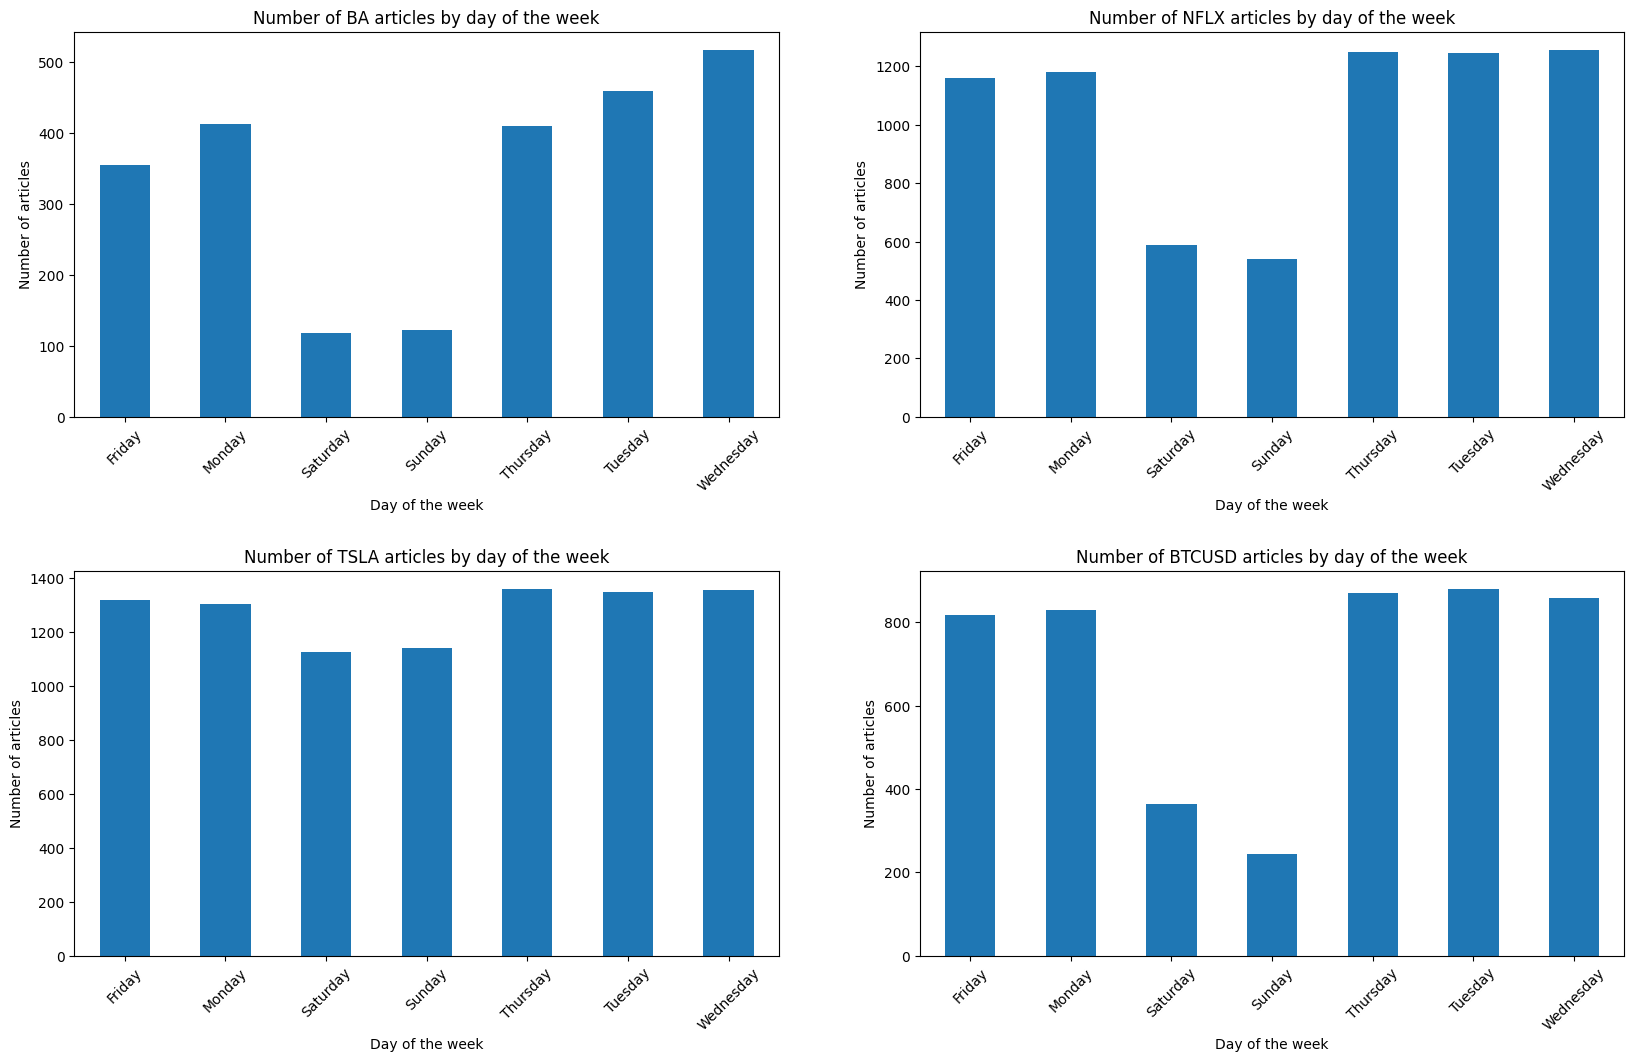

In [31]:
plt.rcParams["figure.figsize"] = (20,12)
fig, axs = plt.subplots(2, 2)


for i, ticker in enumerate(tickers):
    news[ticker]['published_at'] = pd.to_datetime(news[ticker]['published_at'])
    news[ticker]['day_of_week'] = news[ticker]['published_at'].dt.day_name()
    news[ticker].groupby('day_of_week').agg({'title': 'count'}).plot(kind='bar', ax=axs[i//2, i%2])
    # create title
    axs[i//2, i%2].set_title(f'Number of {ticker} articles by day of the week')
    # delete legend
    axs[i//2, i%2].legend().remove()
    # set x-axis label
    axs[i//2, i%2].set_xlabel('Day of the week')
    # set y-axis label
    axs[i//2, i%2].set_ylabel('Number of articles')

    # rotate axis by 45 degrees
    axs[i//2, i%2].tick_params(axis='x', rotation=45)
    # sort the x-axis by day of the week so Monday is first, Sunday is last
    # axs[i//2, i%2].gca().invert_xaxis()

    # make spaces between plots bigger
    plt.subplots_adjust(hspace=0.4)

# save plot as image
plt.savefig('DATA/images/ALL_daily_news.png', bbox_inches='tight')

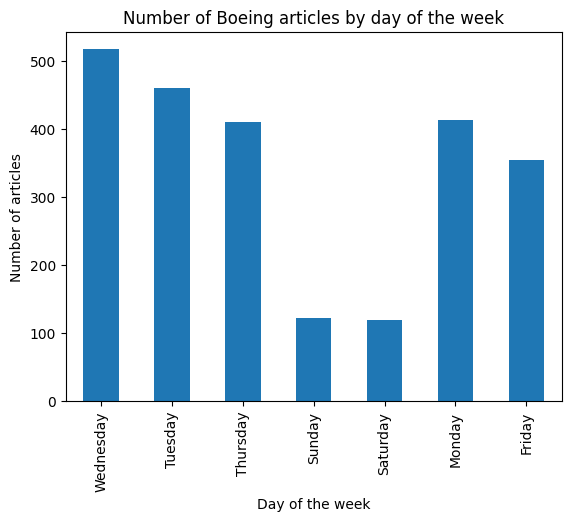

In [9]:
# count the number of rows by day of the week from date in column published_at
news['published_at'] = pd.to_datetime(news['published_at'])
news['day_of_week'] = news['published_at'].dt.day_name()
news.groupby('day_of_week').agg({'title': 'count'})
# plot that in a bar chart in matplotlib
import matplotlib.pyplot as plt
news.groupby('day_of_week').agg({'title': 'count'}).plot(kind='bar')
# create title
plt.title('Number of Boeing articles by day of the week')
# delete legend
plt.legend().remove()
# set x-axis label
plt.xlabel('Day of the week')
# set y-axis label
plt.ylabel('Number of articles')
# sort the x-axis by day of the week so Monday is first, Sunday is last
plt.gca().invert_xaxis()

# save plot as image
plt.savefig('DATA/images/daily_news.png', bbox_inches='tight')


In [34]:
for ticker in tickers:
    news[ticker]['date_8'] = news[ticker]['published_at'] - pd.Timedelta(hours=8)
    

In [10]:
# subtract 8 hours from published_at column in new column
news['date_8'] = news['published_at'] - pd.Timedelta(hours=8)
news.loc[:, ['published_at', 'date_8']]



,published_at,date_8
0,2021-01-01 16:01:02+00:00,2021-01-01 08:01:02+00:00
1,2021-01-01 16:00:00+00:00,2021-01-01 08:00:00+00:00
2,2021-01-01 16:00:00+00:00,2021-01-01 08:00:00+00:00
3,2021-01-02 03:28:45+00:00,2021-01-01 19:28:45+00:00
4,2021-01-04 15:24:25+00:00,2021-01-04 07:24:25+00:00
...,...,...
2391,2023-11-22 13:51:38+00:00,2023-11-22 05:51:38+00:00
2392,2023-11-23 12:55:00+00:00,2023-11-23 04:55:00+00:00
2393,2023-11-23 13:01:00+00:00,2023-11-23 05:01:00+00:00
2394,2023-11-24 14:36:26+00:00,2023-11-24 06:36:26+00:00


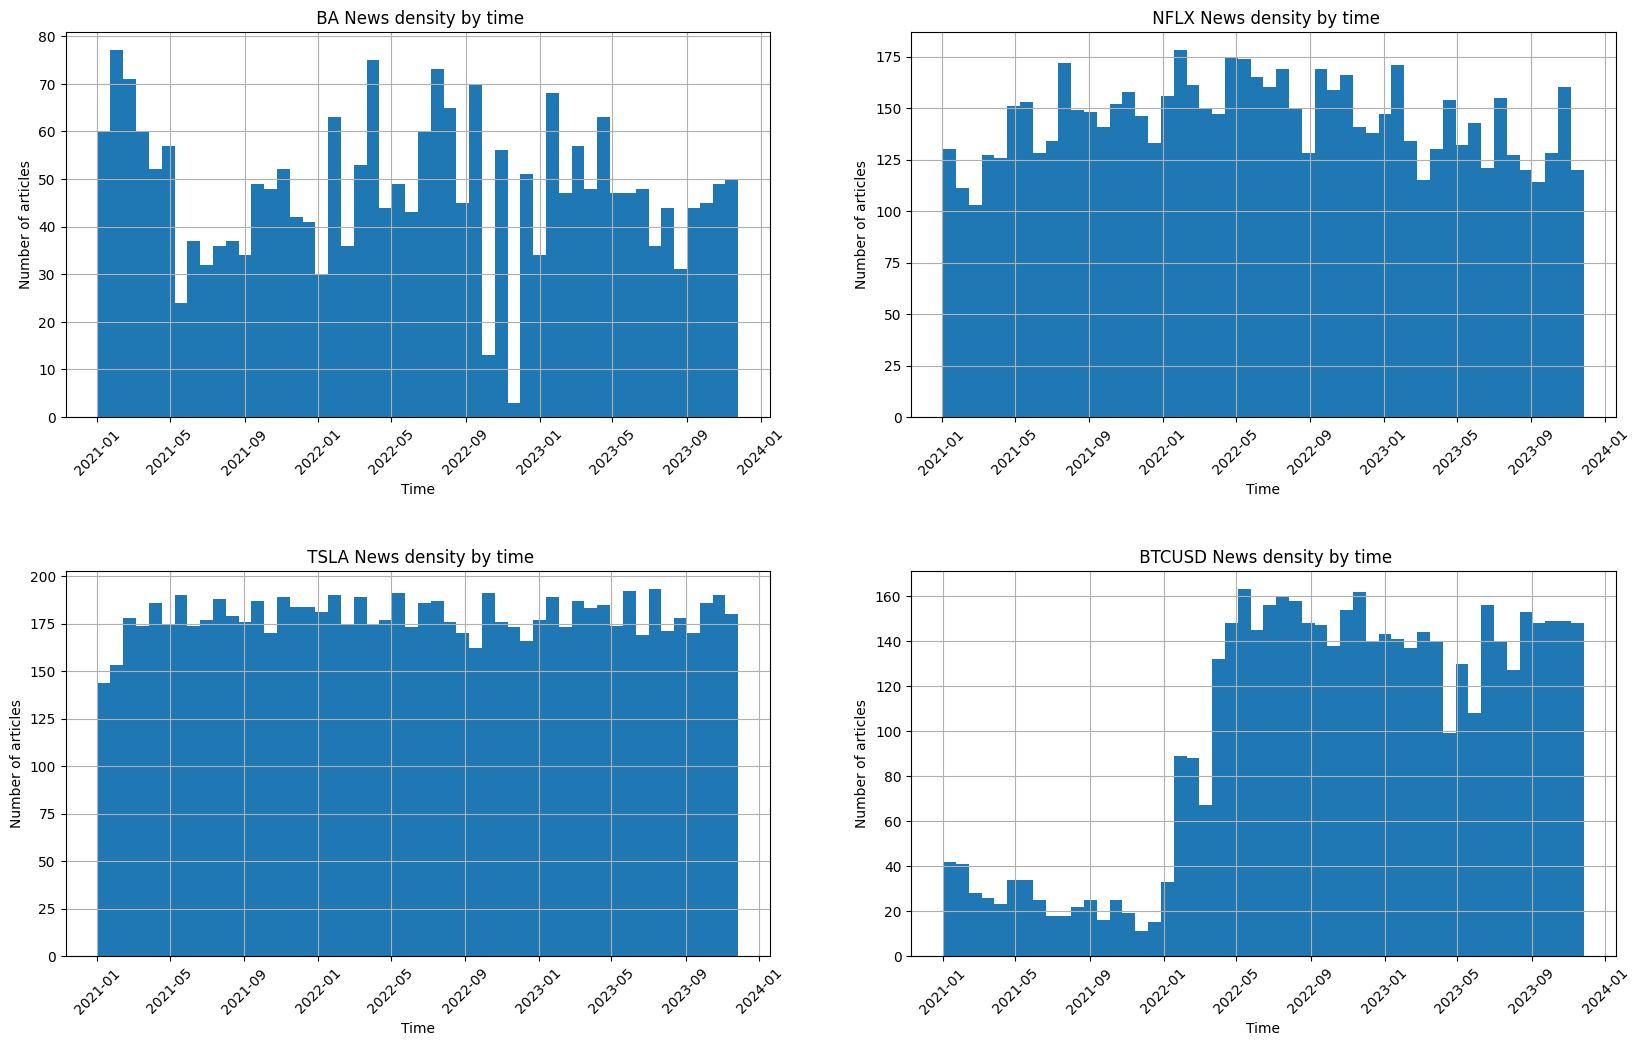

In [41]:
plt.rcParams["figure.figsize"] = (20,12)
fig, axs = plt.subplots(2, 2)

for i, ticker in enumerate(tickers):
    news[ticker]['published_at'].hist(bins=50, ax=axs[i//2, i%2])

    # rotate x axis by 45 degrees
    axs[i//2, i%2].set_title( f' {ticker} News density by time')
    axs[i//2, i%2].set_xlabel('Time')
    axs[i//2, i%2].set_ylabel('Number of articles')
    axs[i//2, i%2].tick_params(axis='x', rotation=45)
plt.subplots_adjust(hspace=0.4)
plt.savefig('DATA/images/ALL_news_density.png', bbox_inches='tight')

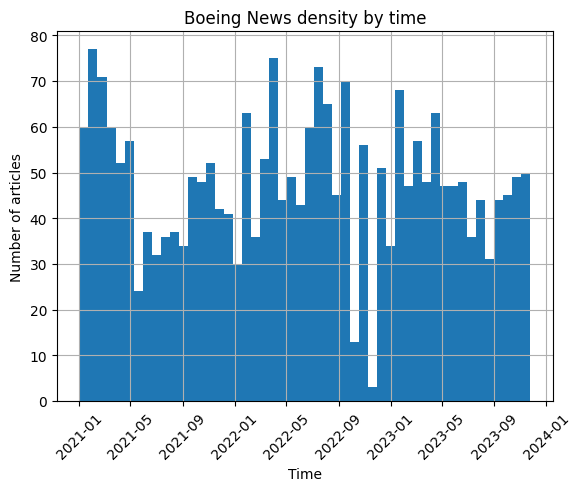

In [11]:
# plot news density by time
news['published_at'] = pd.to_datetime(news['published_at'])
news['published_at'].hist(bins=50)

# rotate x axis by 45 degrees
plt.xticks(rotation=45)
plt.title( 'Boeing News density by time')
plt.xlabel('Time')
plt.ylabel('Number of articles')
plt.savefig('DATA/images/news_density.png', bbox_inches='tight')

<Axes: xlabel='published_at'>

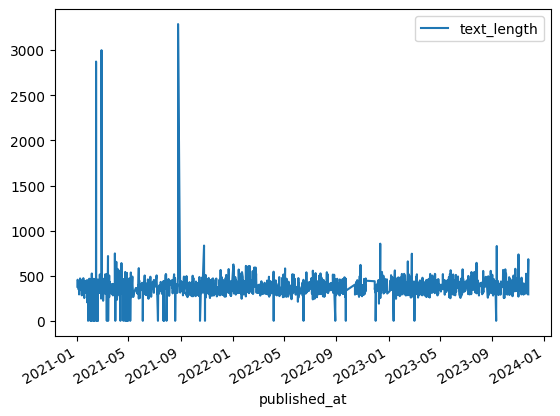

In [22]:
news["text"] = (news["title"] + ". " + news["description"]+". "+news["snippet"]).astype(str)
# plot text length by time
news['text_length'] = news['text'].apply(lambda x: len(x))
news.groupby('published_at').agg({'text_length': 'mean'}).plot(kind='line')

# Sentiment Density

## FinBERT

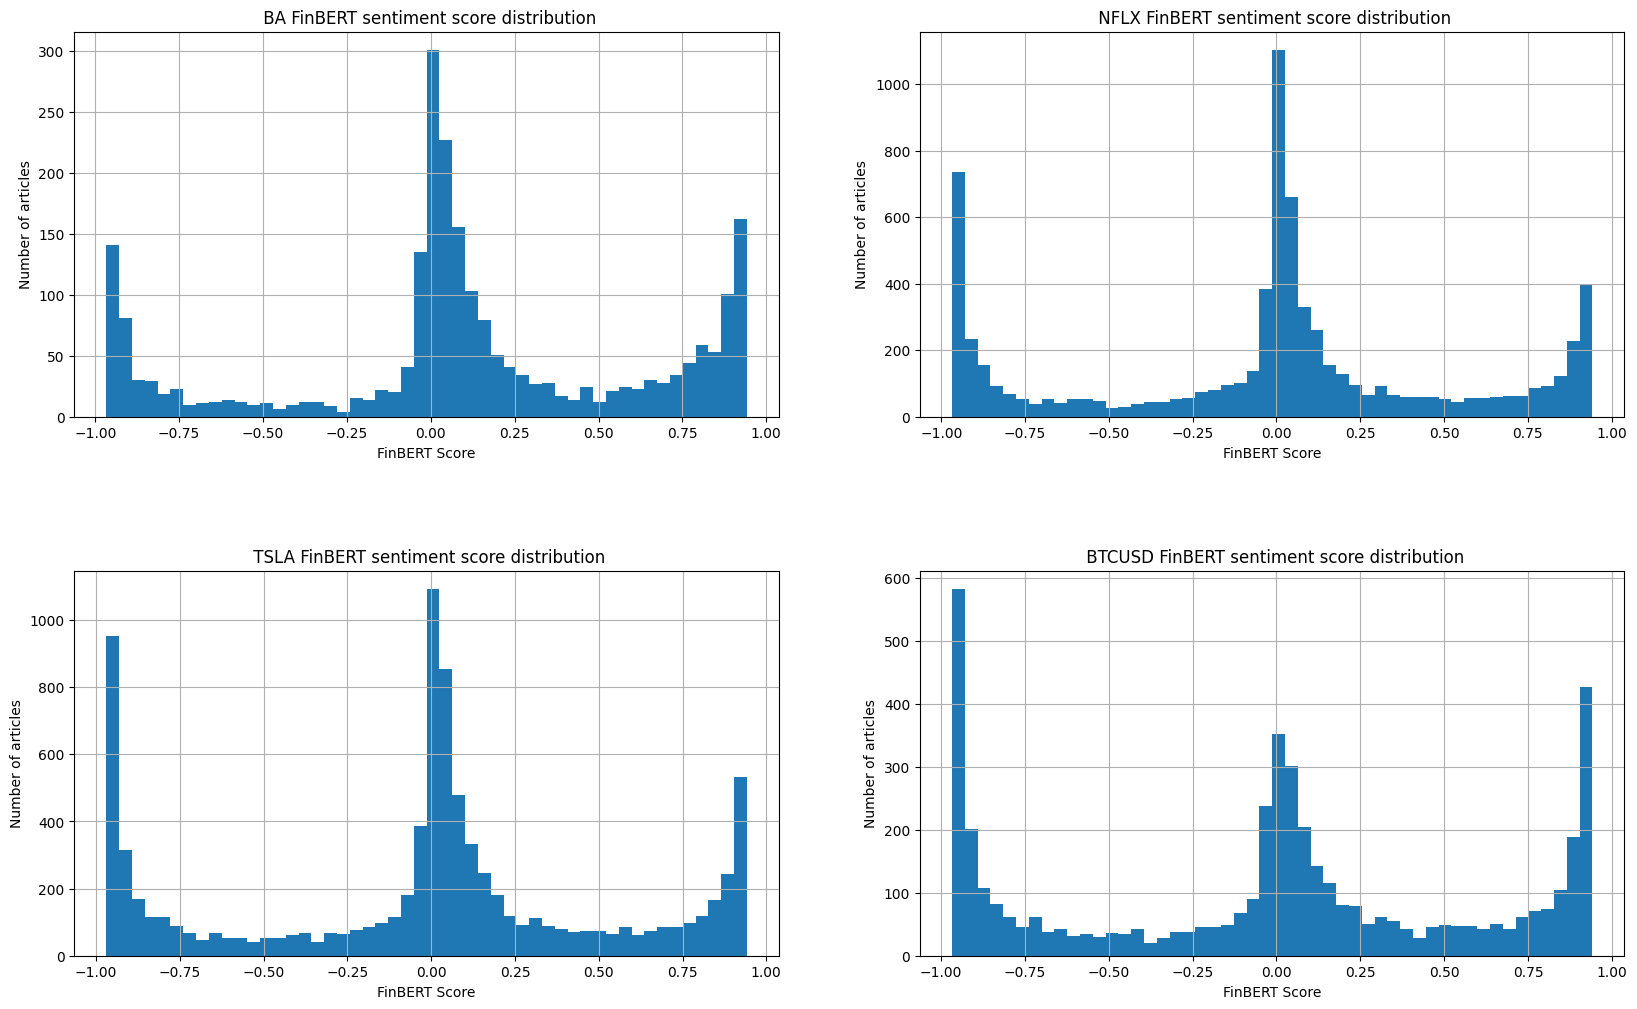

In [46]:
plt.rcParams["figure.figsize"] = (20,12)
fig, axs = plt.subplots(2, 2)

for i, ticker in enumerate(tickers):
    news[ticker]['finbert_Score'].hist(bins=50, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f' {ticker} FinBERT sentiment score distribution')
    axs[i//2, i%2].set_xlabel('FinBERT Score')
    axs[i//2, i%2].set_ylabel('Number of articles')
plt.subplots_adjust(hspace=0.4)
plt.savefig('DATA/images/ALL_finbert_score.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density of FinBERT sentiment score on Boeing news')

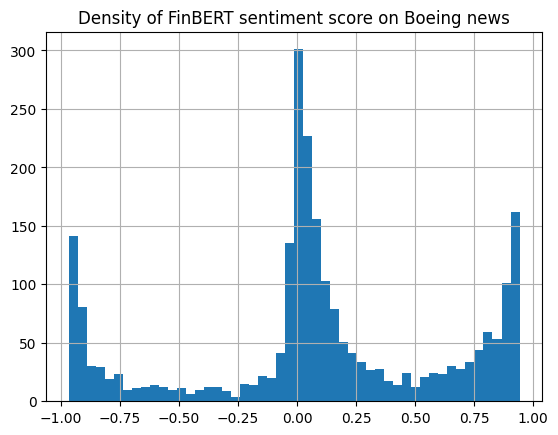

In [27]:
# plot density of finbert_score
news['finbert_Score'].hist(bins=50)
# add title
plt.title('Density of FinBERT sentiment score on Boeing news')

## BART

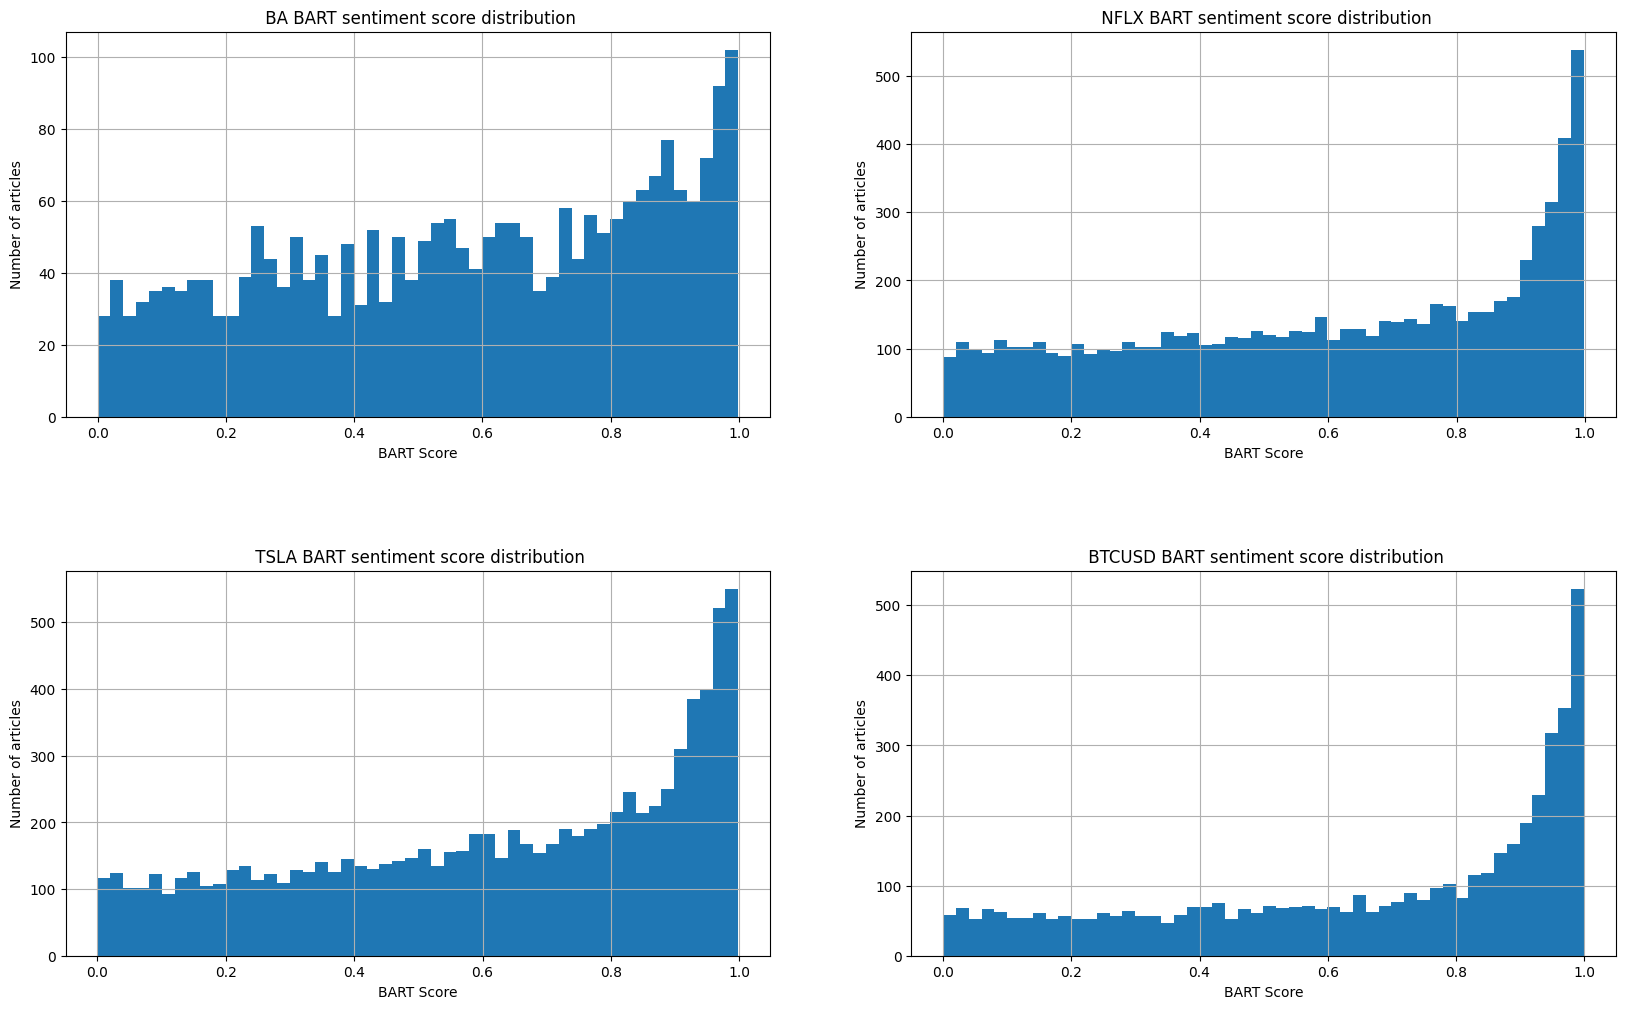

In [47]:
plt.rcParams["figure.figsize"] = (20,12)
fig, axs = plt.subplots(2, 2)

for i, ticker in enumerate(tickers):
    news[ticker]['bart_Score'].hist(bins=50, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f' {ticker} BART sentiment score distribution')
    axs[i//2, i%2].set_xlabel('BART Score')
    axs[i//2, i%2].set_ylabel('Number of articles')
plt.subplots_adjust(hspace=0.4)
plt.savefig('DATA/images/ALL_bart_score.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density of BART sentiment score on Boeing news')

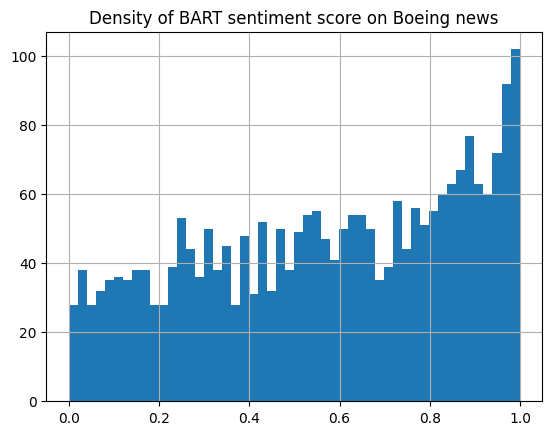

In [28]:
# plot density of bart_Score
news['bart_Score'].hist(bins=50)
# add title
plt.title('Density of BART sentiment score on Boeing news')

## VADER

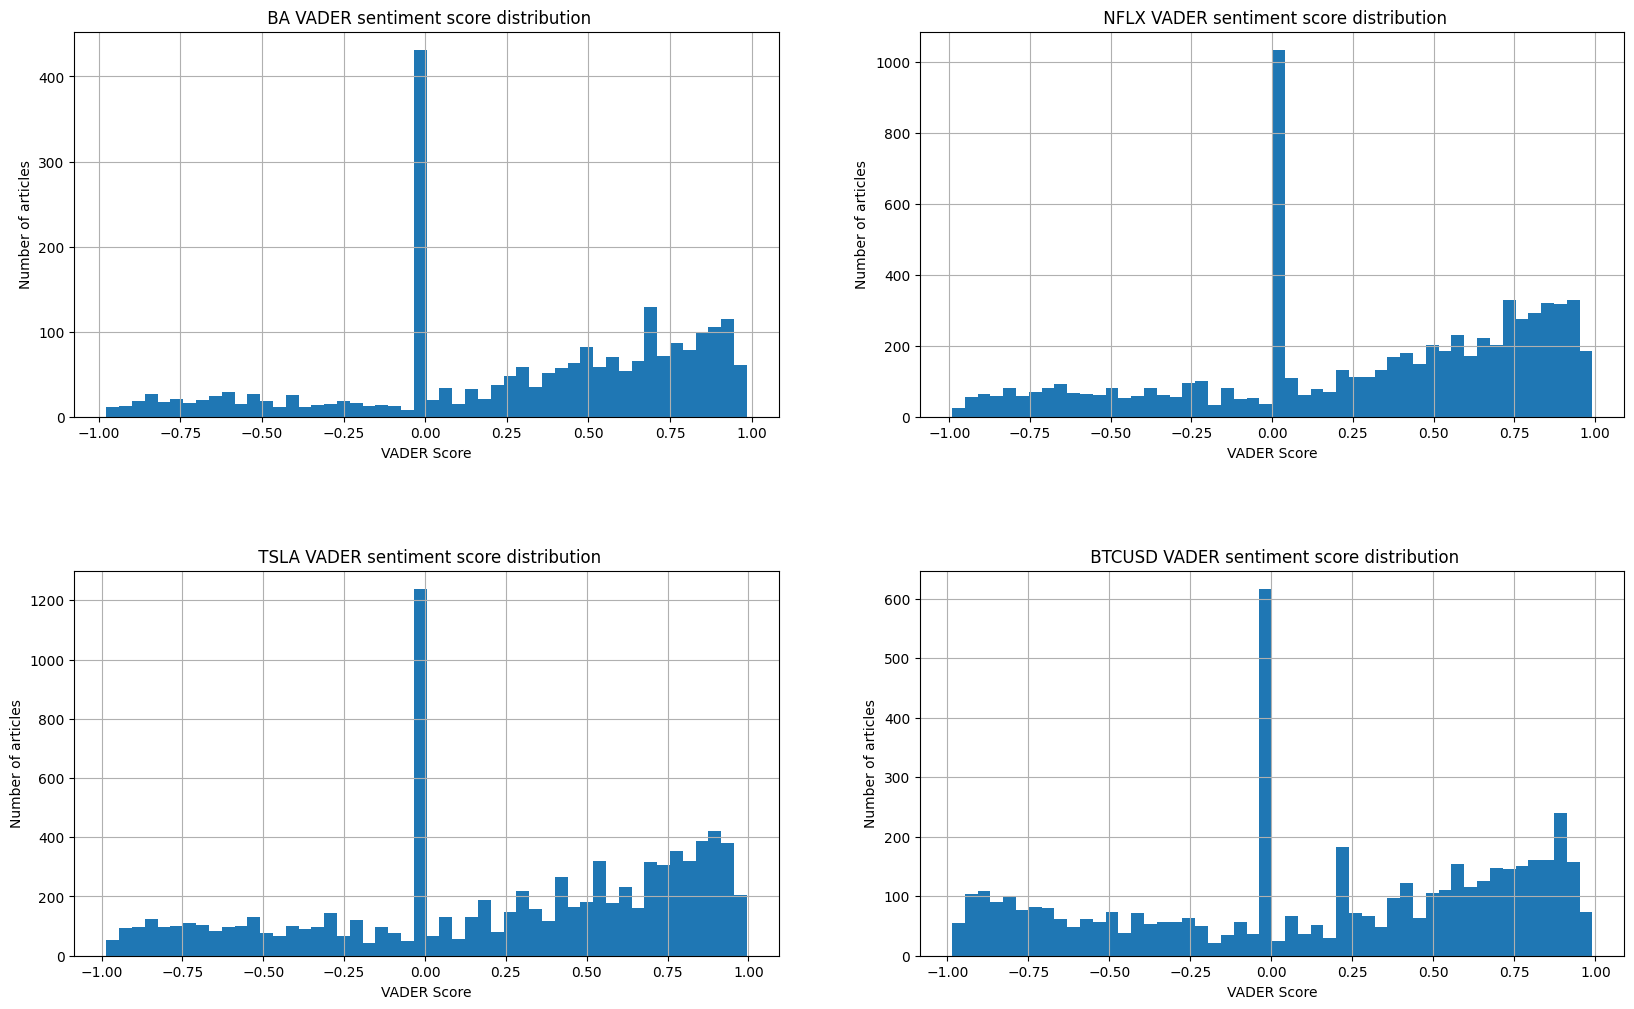

In [48]:
plt.rcParams["figure.figsize"] = (20,12)
fig, axs = plt.subplots(2, 2)

for i, ticker in enumerate(tickers):
    news[ticker]['vader_Score'].hist(bins=50, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f' {ticker} VADER sentiment score distribution')
    axs[i//2, i%2].set_xlabel('VADER Score')
    axs[i//2, i%2].set_ylabel('Number of articles')
plt.subplots_adjust(hspace=0.4)
plt.savefig('DATA/images/ALL_vader_score.png', bbox_inches='tight')

Text(0.5, 1.0, 'Density of VADER sentiment score on Boeing news')

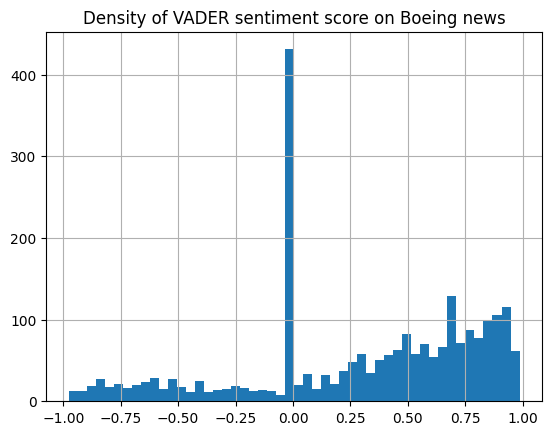

In [30]:
# plot density of vader_Score
news['vader_Score'].hist(bins=50)
plt.title('Density of VADER sentiment score on Boeing news')

# Classes Density

In [ ]:
!pip install findspark

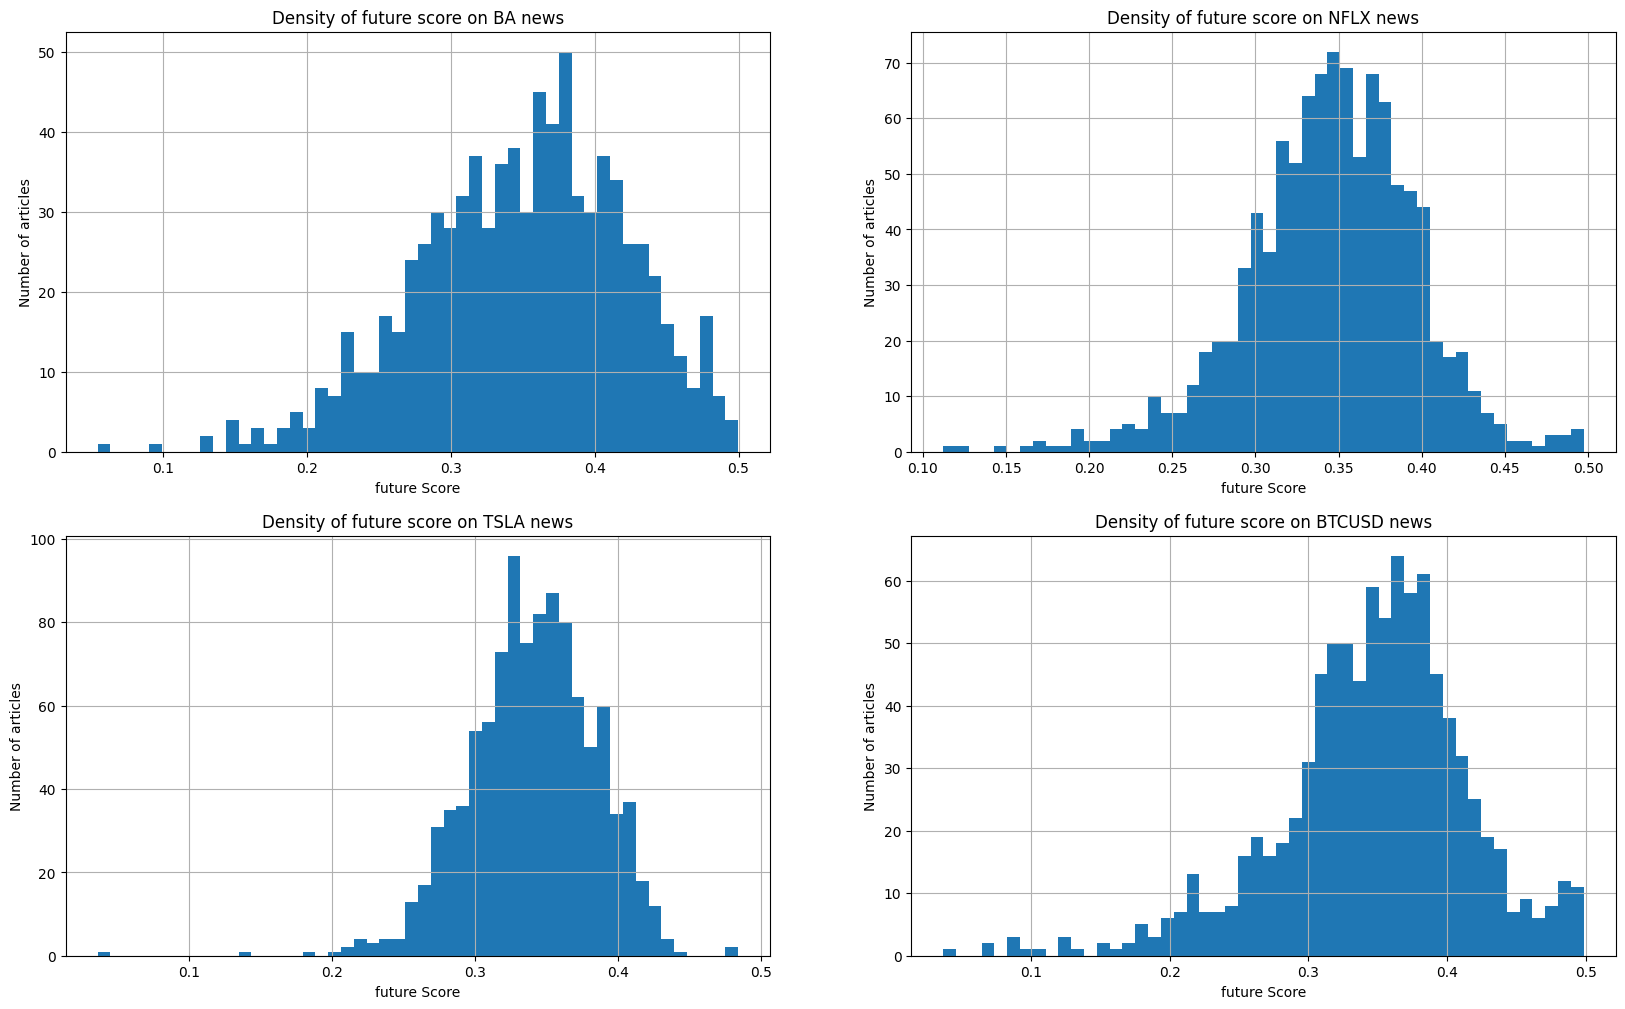

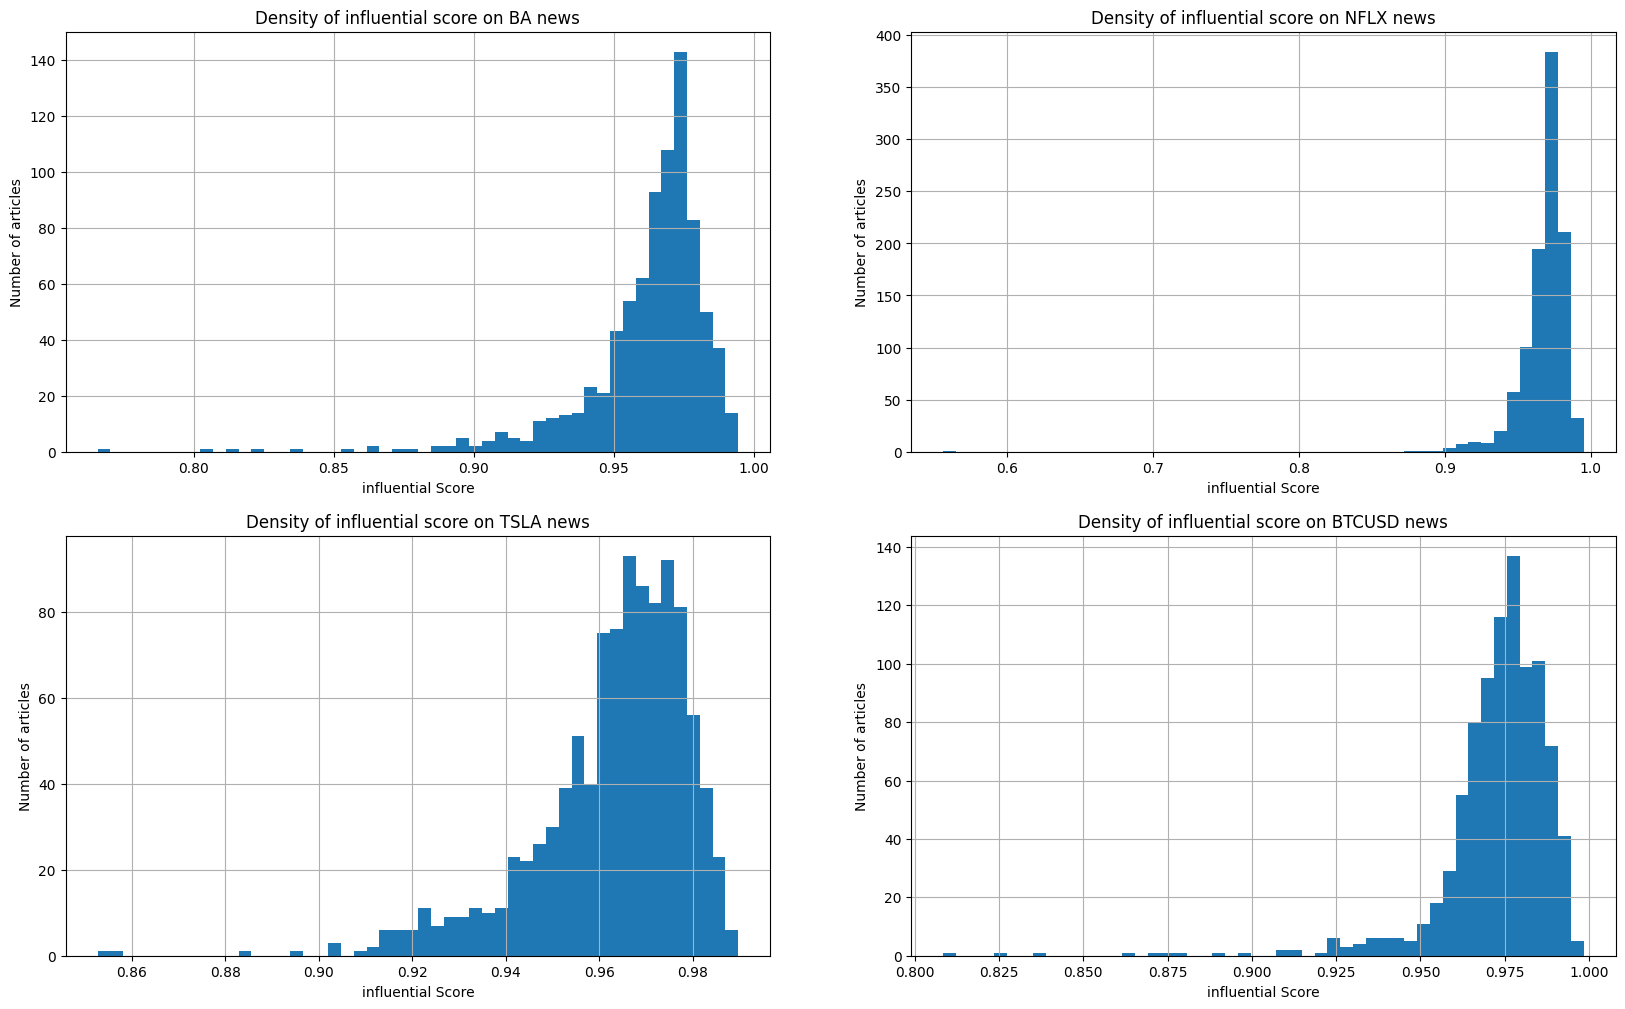

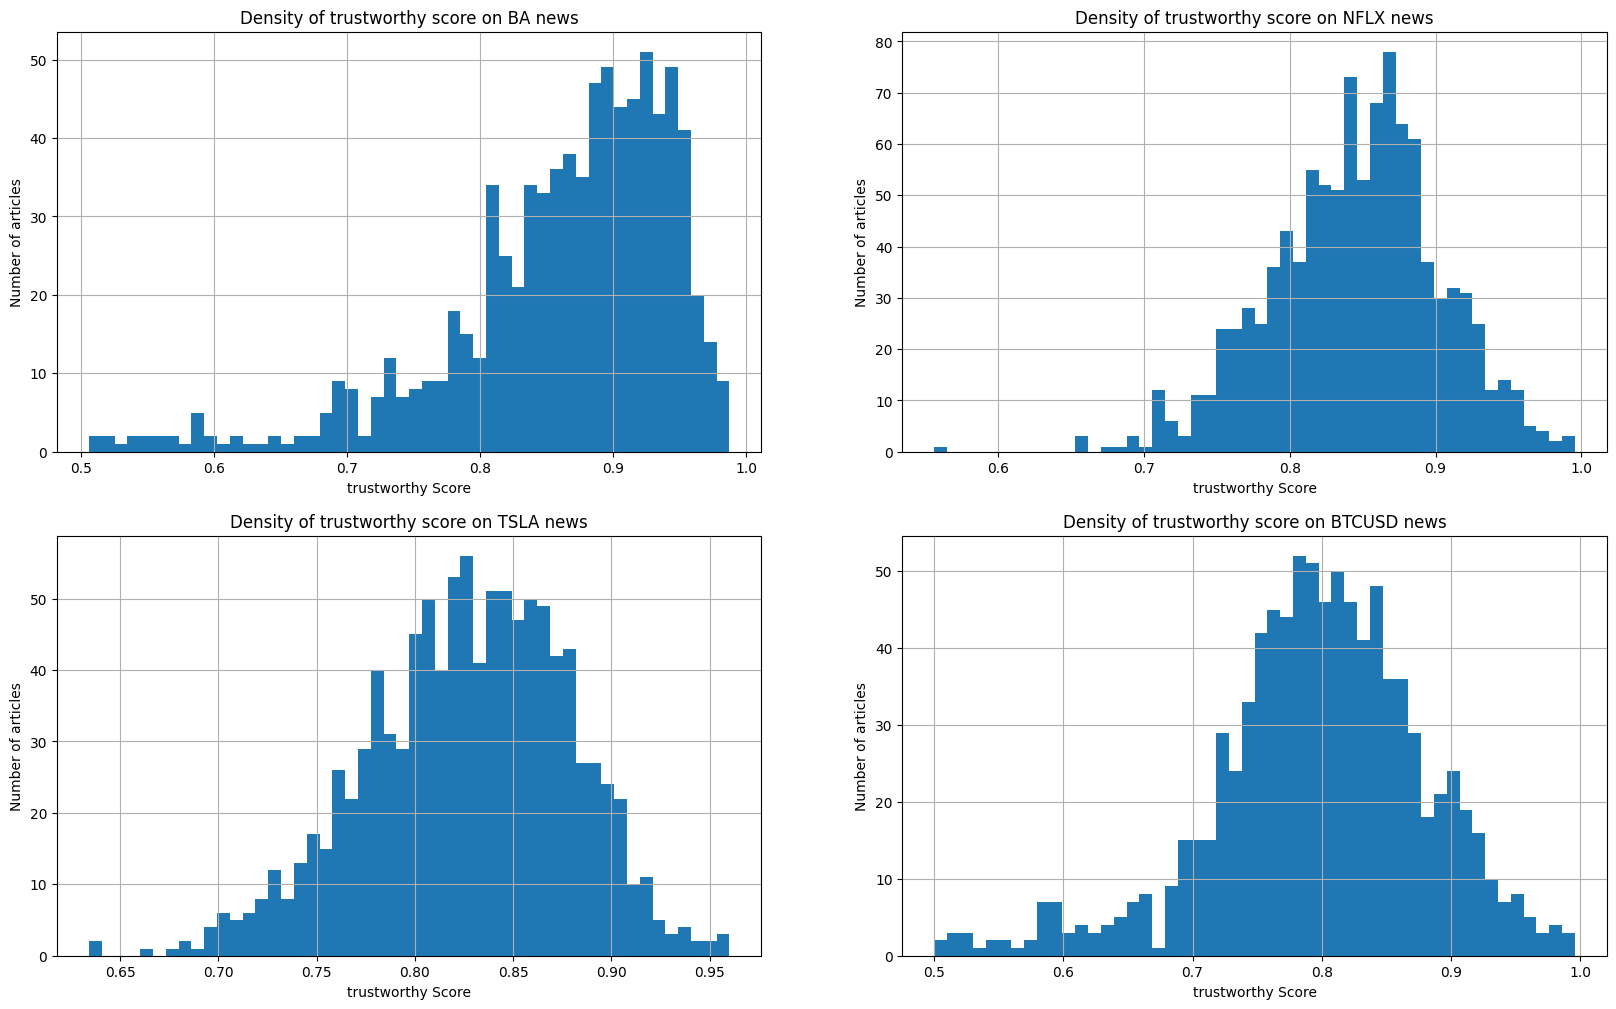

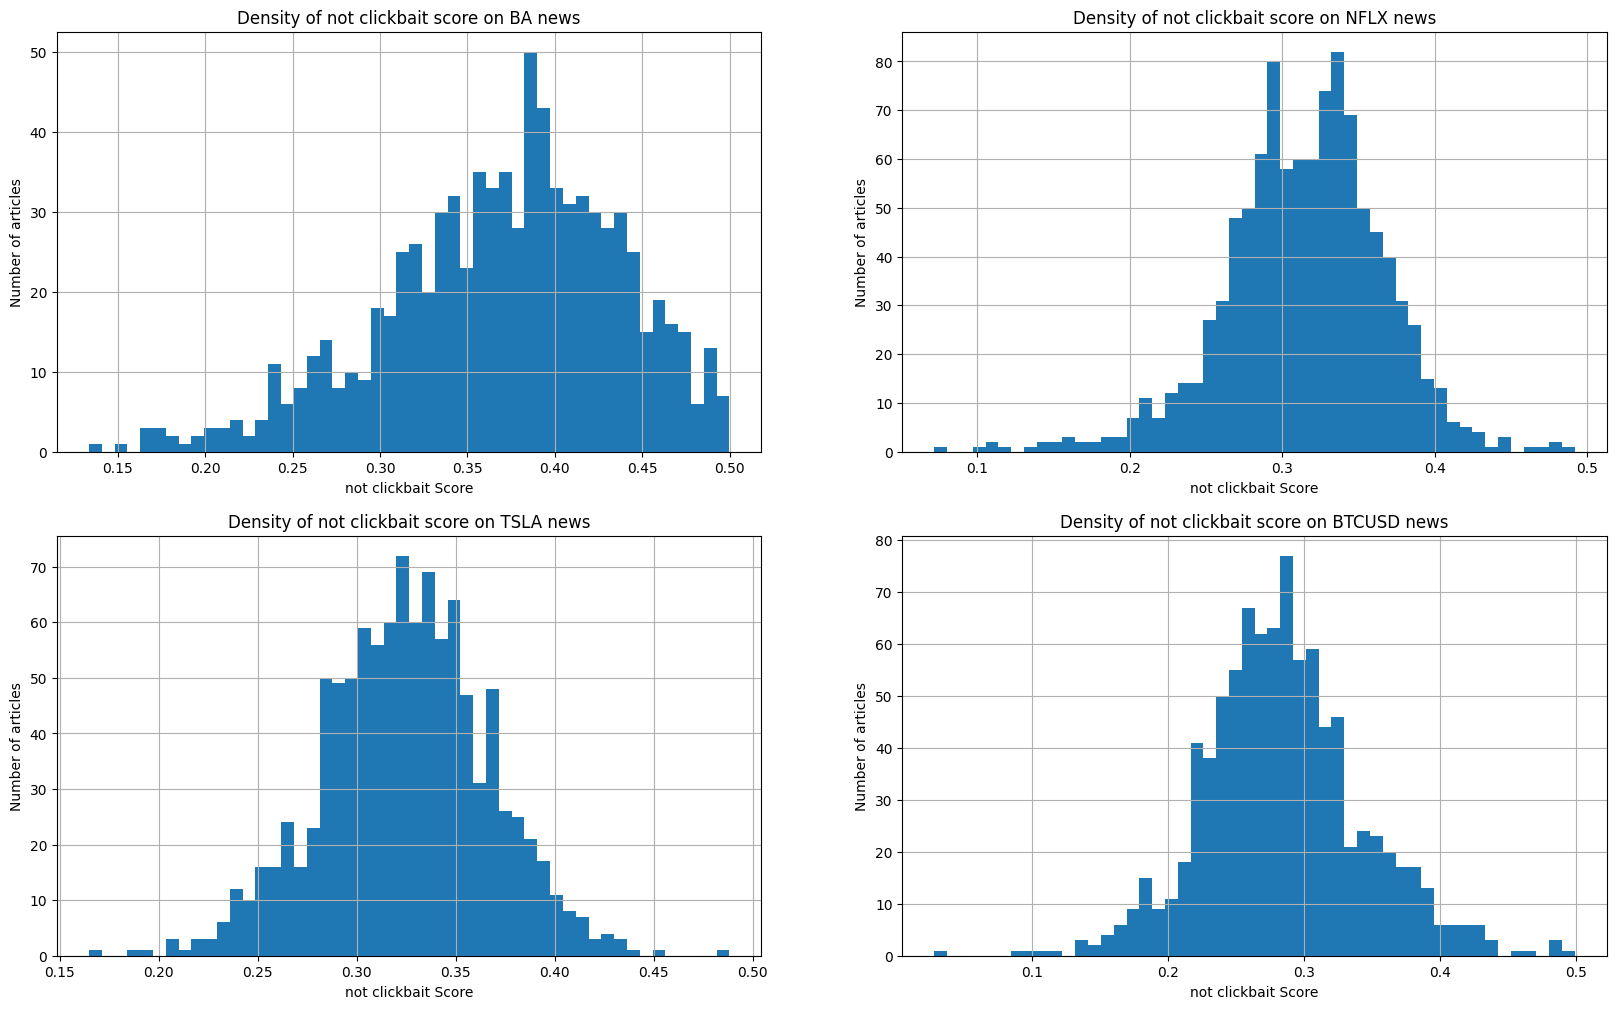

In [12]:


for class_ in ["future", "influential", "trustworthy", "not clickbait"]:

    plt.rcParams["figure.figsize"] = (20,12)
    fig, axs = plt.subplots(2, 2)

    for i, ticker in enumerate(tickers):
        aggr[ticker][class_].hist(bins=50, ax=axs[i//2, i%2])
        axs[i//2, i%2].set_title(f"Density of {class_} score on {ticker} news")
        axs[i//2, i%2].set_xlabel(f"{class_} Score")
        axs[i//2, i%2].set_ylabel('Number of articles')
    
    plt.savefig(f'DATA/images/ALL_{class_}_score.png', bbox_inches='tight')
    plt.show()

In [36]:
aggr.columns

Index(['Unnamed: 0', 'day', 'future', 'influential', 'trustworthy',
       'not clickbait', 'finbert_Score', 'bart_Score', 'vader_Score',
       'future_finbert', 'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader'],
      dtype='object')

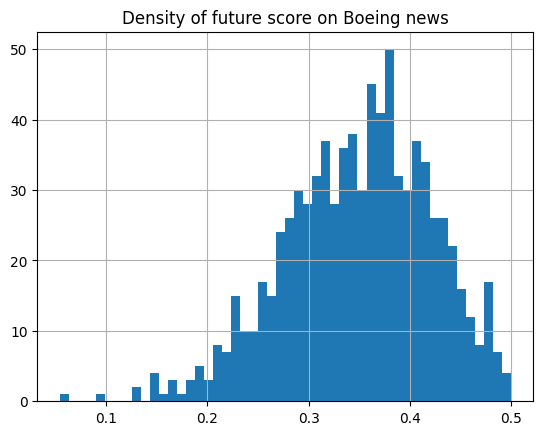

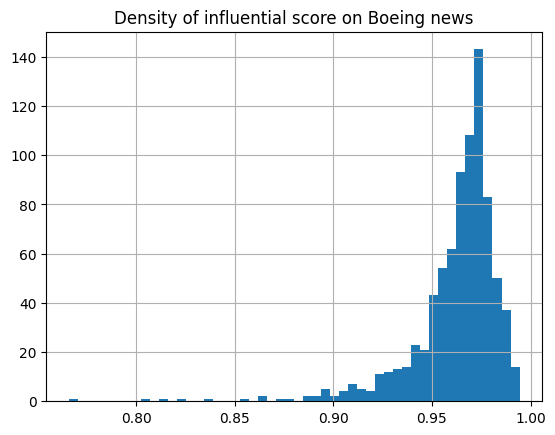

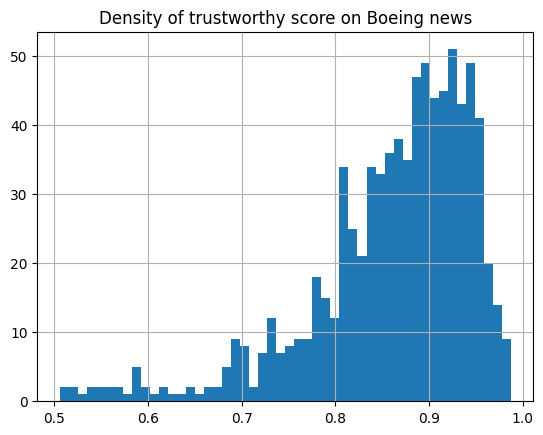

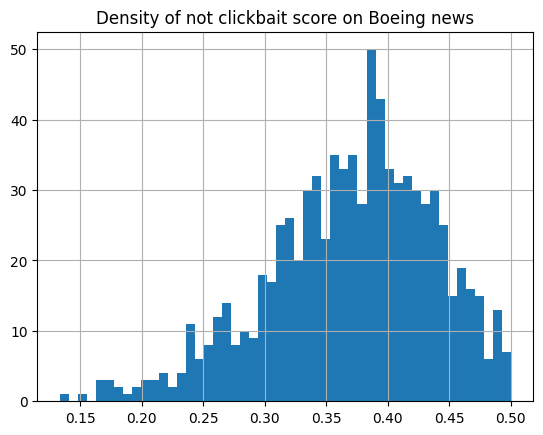

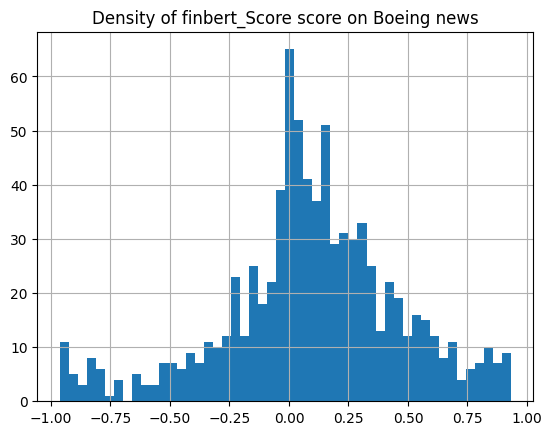

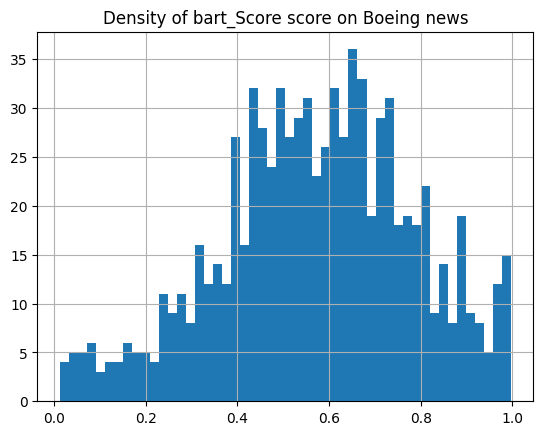

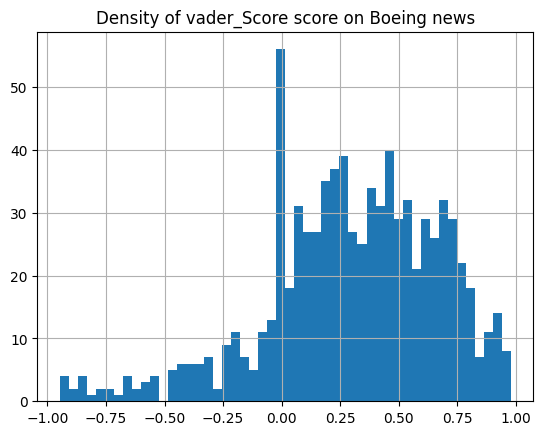

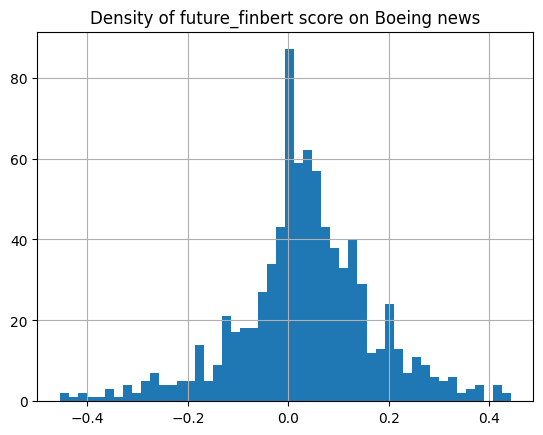

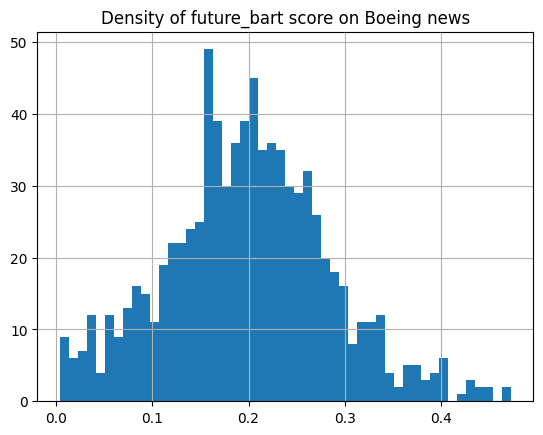

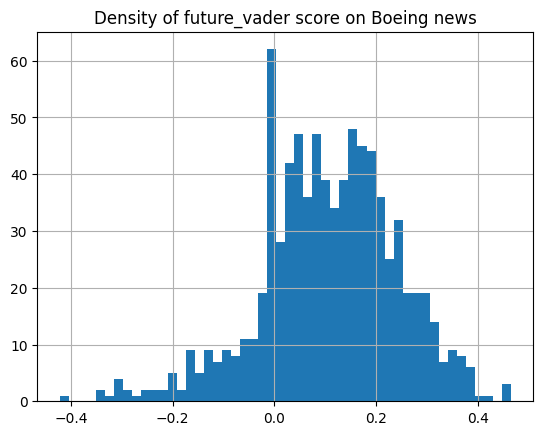

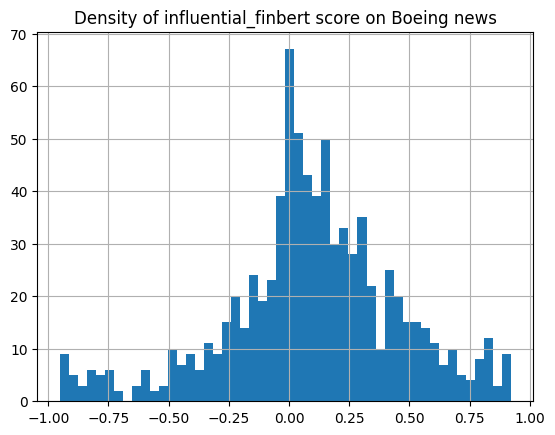

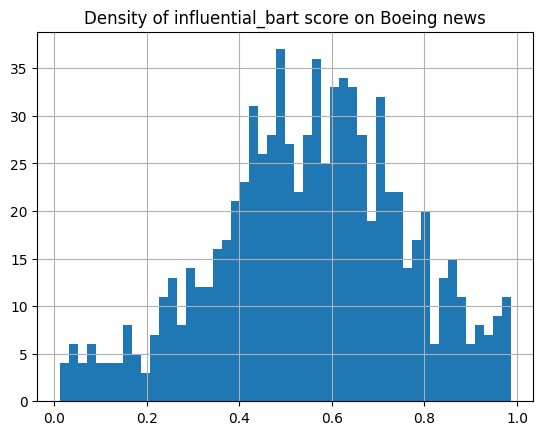

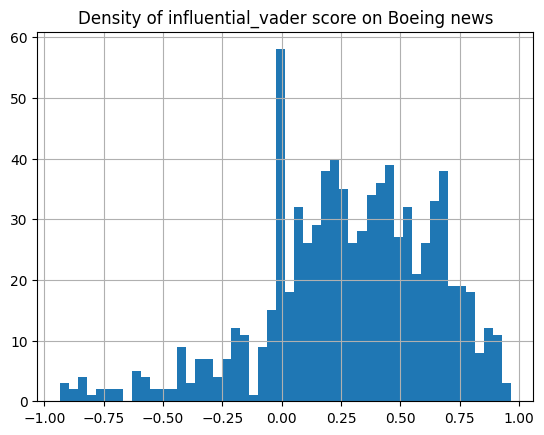

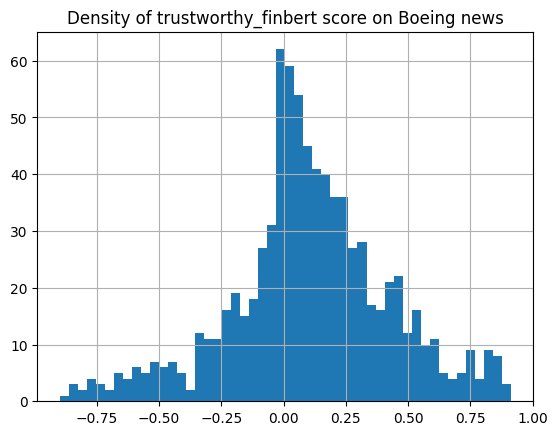

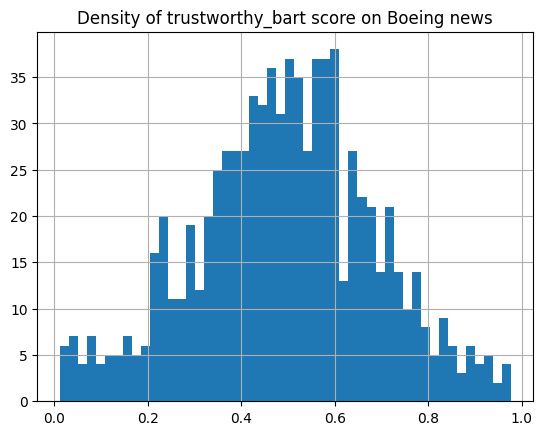

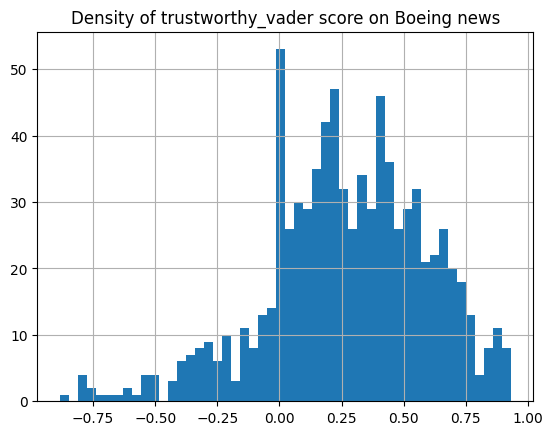

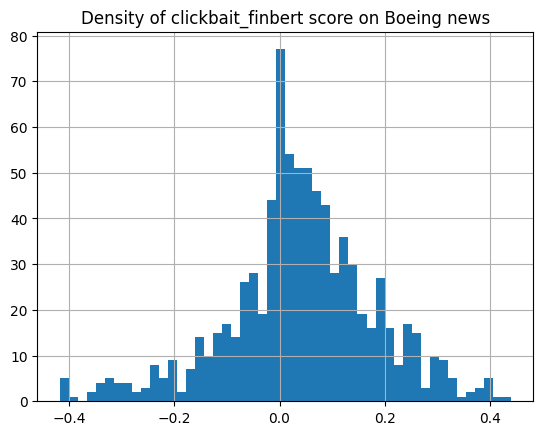

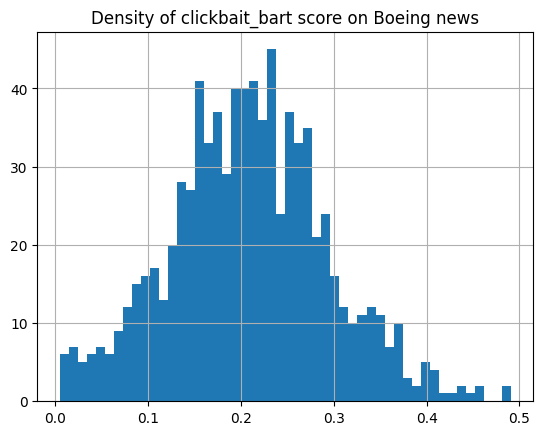

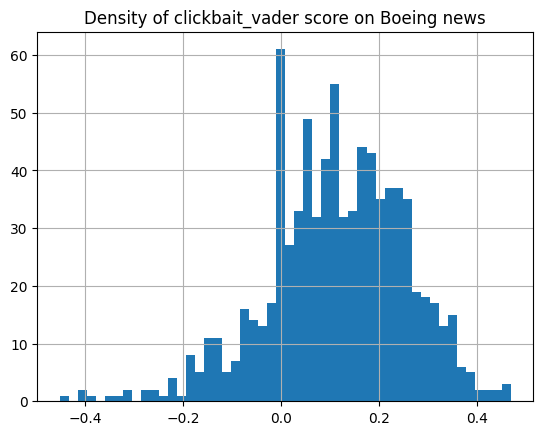

In [40]:
# plot density of finbert_influential
for column in list(aggr.columns)[2:]:
    aggr[column].hist(bins=50)
    plt.title(f"Density of {column} score on Boeing news")
    plt.show()